### WELCOME TO NOBEL PRIZE DATA VISUALIZATION
- The dataset nobel.csv is loaded.
- Then the first 6 values are displayed.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv(r"C:/Users/ADMIN/Downloads/nobel.csv")

# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...
nobel.head(n=6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


### TOP 10 COUNTRIES TO WIN NOBEL
- The prize won by both male and female recipients is displayed.
- The number of prizes won by the top 10 nations is displayed.

In [3]:

nobel['sex'].value_counts().head()

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

### DOMINANCE OF USA
- The usa_born_winner is found and also the deacade value is found.
- Using these two the proportions of USA winners per decade is displayed.

In [4]:
nobel['usa_born_winner'] =nobel['birth_country']=="United States of America"
nobel['decade'] =(np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade',as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


### VISUALIZATION OF USA DOMINANCE
Here the previous calculations are visualized using seaborn lineplot.

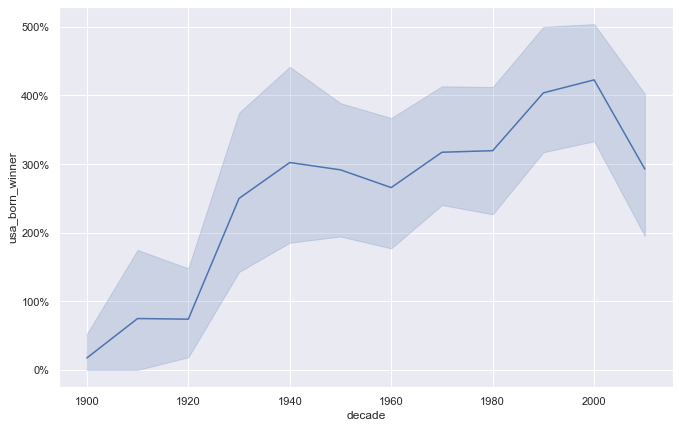

In [5]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(nobel.decade,nobel['usa_born_winner'])

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
ax.yaxis.set_major_formatter(PercentFormatter(0.1))

### FEMALE WINNERS OF USA VISUALIZATION
- The female winners are first found and stored in female_winner column.
- The prop_female_winners are then created by grouping decade and category.
- This is then visualized using a lineplot of seaborn

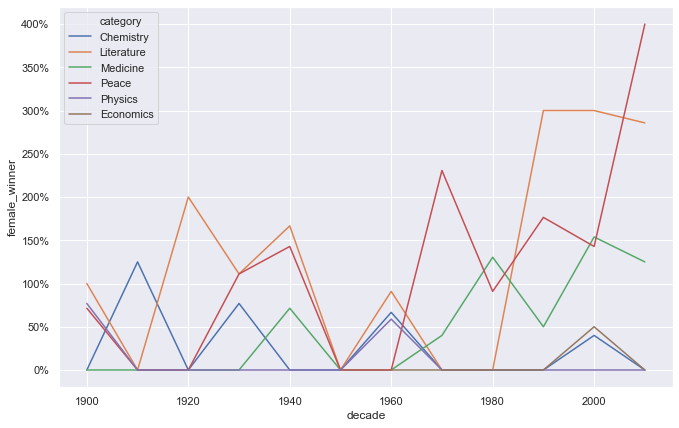

In [6]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] =nobel['sex']=='Female'
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
ax = sns.lineplot(x='decade',y='female_winner',hue='category',data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(0.1))

### FIRST WOMAN TO WIN NOBEL
 This is found using nsmallest function.

In [7]:
nobel[nobel['sex']=='Female'].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


### MORE THAN ONE NOBEL PRIZE
 Scientists who have won more than one time is found out.

In [8]:
nobel.groupby('full_name').filter(lambda prize:len(prize)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


### THE AGE OF WINNER WHEN THEY WON
- Convert the birth_date column to datetime format.
- The age of each laureat is found.
- Using sns.lmplot the above data is visualized.

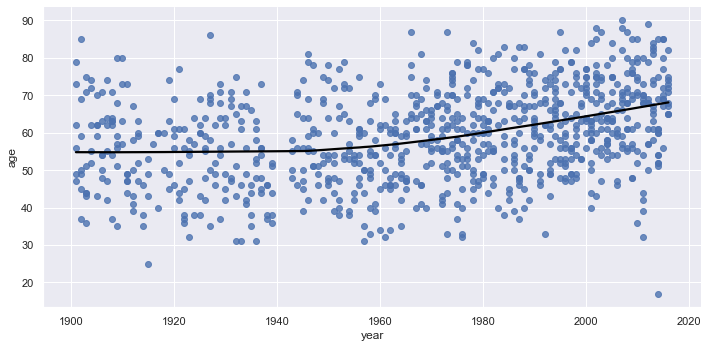

In [9]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age']=nobel['year']-nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year',y='age',data=nobel,lowess=True,aspect=2,line_kws={'color':'black'})

### AGE TRENDS OF DIFFERENT CATEGORY
  The ages of various laureats at the time of winning is compared with different category.

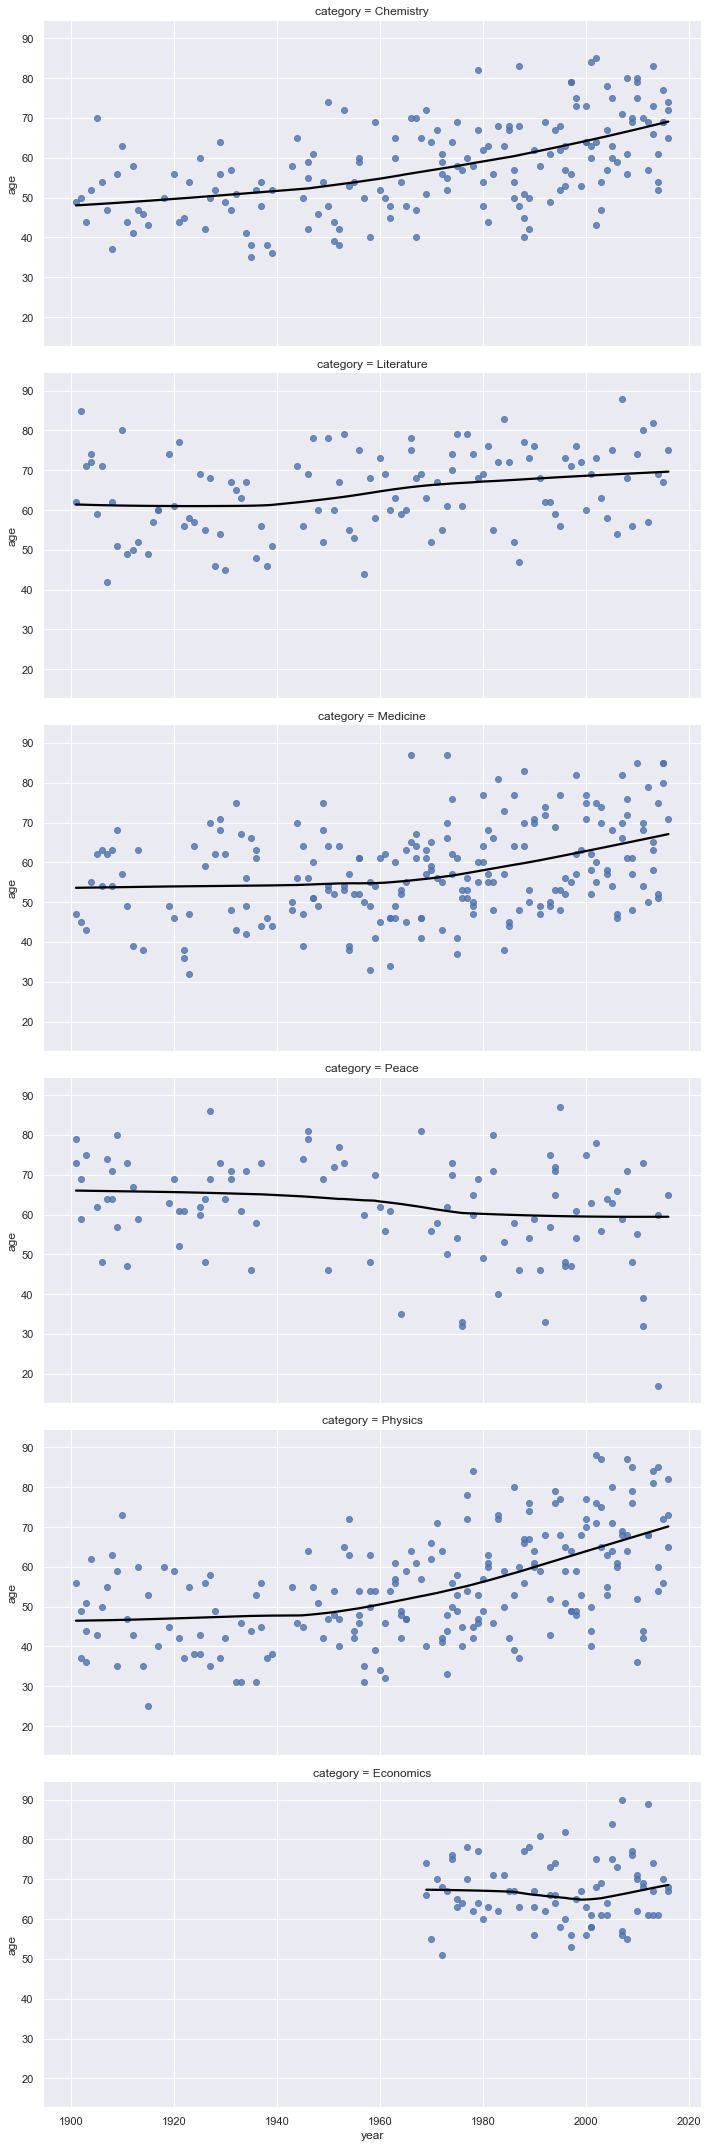

In [10]:
sns.lmplot(x='year',y='age',row='category',data=nobel,lowess=True,aspect=2,line_kws={'color':'black'})


More plots with lots of exciting stuff going on!Both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable.

### OLDEST AND YOUNGEST WINNERS
 The oldest and youngest nobel prize winners are found out.

In [11]:
nobel.nlargest(1,'age')

# The youngest winner of a Nobel Prize as of 2016
# ... YOUR CODE FOR TASK 10 ...
nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0
